In [1]:
import numpy as np
import xarray as xr
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as datetime

In [14]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc") #i=103
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/GitHub/BottomBoundaryLayer/psi_base_ocng_test.nc")

tf =int(5*2*np.pi/(2*(7.292115*10**(-5)*np.sin(np.pi/4)))) #314159
dt = int(2*np.pi/(2*(7.292115*10**(-5)*np.sin(np.pi/4))))*10**(8)
# ocean_data2 = ocean_data.sel(time=slice("0",str(tf)))
# print(tf*10**(8))
# ocean_data.time[103]

In [13]:
print(tf)

304636


In [15]:
ocean_data.time

<xarray.DataArray 'time' (time: 11)>
array([            0,  100000000000,  200000000000,  300000000000,
        400000000000,  500000000000,  600000000000,  700000000000,
        800000000000,  900000000000, 1000000000000], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00:01:40 ... 00:15:00 00:16:40
Attributes:
    longname:  Time

In [5]:
dot_prod = np.square((ocean_data["u"])).mean(dim=["yC","zC"])+np.square((ocean_data["v"])).mean(dim=["yF","zC"])
# dot_prod = np.square((ocean_data["u"])).mean(dim=["yC","zC"])+np.square((ocean_data["v"])).mean(dim=["yF","zC"])+np.square(ocean_data["w"]).mean(dim=["yC","zF"])

KE = 0.5*dot_prod
KE5 = KE.isel(time=103)
dta = KE/KE5

IndexError: index 103 is out of bounds for axis 0 with size 49

In [6]:
dta

NameError: name 'dta' is not defined

In [7]:
# dt = dta.isel(time=[103,105])
dta.plot()

NameError: name 'dta' is not defined

In [19]:
print(tf)
# KE.sel(time=tf*10**(8),method='nearest')
KEN = KE.drop_indexes(["xF",'xC'])
KEN.isel(time=103)

304636


<xarray.DataArray (xF: 1, xC: 1)>
array([[1.87376676e-05]])
Coordinates:
    xF       (xF) float64 1.0
    time     timedelta64[ns] 3 days 12:37:16.099276984
    xC       (xC) float64 1.0

In [ ]:
f = 2*(7.292115e-5)*np.sin(np.pi/4)
B = (ocean_data.N2)**(1/2)
N = B
mean_N= N.mean(dim=["yC","zC"])
N_f = mean_N/f

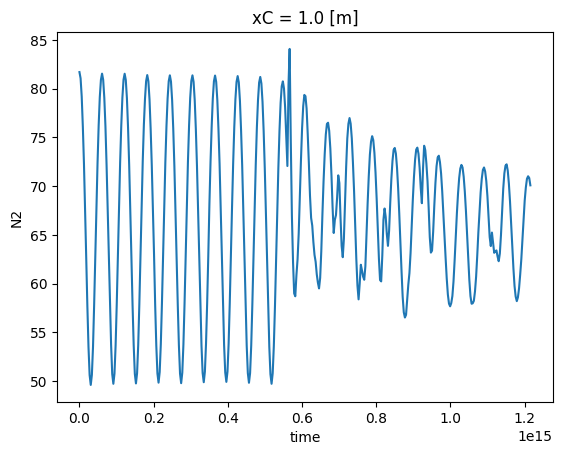

In [ ]:
N_f.plot()